In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
os.chdir('/content/drive/My Drive/Colab Notebooks/RockPaperScissors')
!ls

Dataset  Rock-Paper-Scissors-Classifier.ipynb


In [13]:
cur_dir = os.getcwd()
rock_dir = os.path.join(cur_dir,"Dataset","Train","rock")
paper_dir = os.path.join(cur_dir,"Dataset","Train","paper")
scissors_dir = os.path.join(cur_dir,"Dataset","Train","scissors")
print(rock_dir)

/content/drive/My Drive/Colab Notebooks/RockPaperScissors/Dataset/Train/rock


In [14]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 848


In [0]:
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

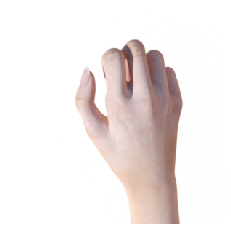

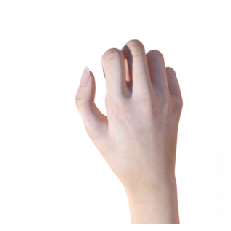

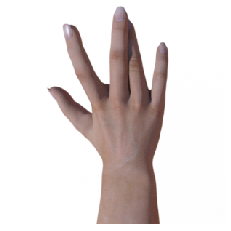

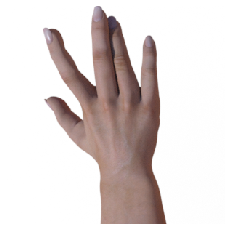

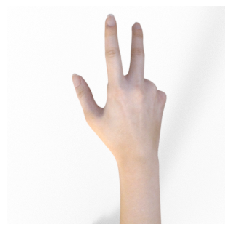

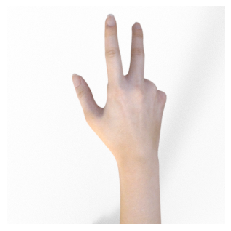

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

pic_index = 2
next_rock = [os.path.join(rock_dir,fname) 
             for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir,fname) 
             for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir,fname) 
             for fname in scissors_files[pic_index-2:pic_index]]

for i,img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [17]:
import tensorflow as tf 
import keras_preprocessing
from keras_preprocessing import image 
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = os.path.join(cur_dir,"Dataset","Train")

training_datagen = ImageDataGenerator(
                    rescale=1.0/255.0,
                    rotation_range=40,
                    width_shift_range=0.20,
                    height_shift_range=0.20,
                    shear_range=0.20,
                    zoom_range=0.20,
                    horizontal_flip=True,
                    fill_mode="nearest")

VALIDATION_DIR = os.path.join(cur_dir,"Dataset","Test")
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(150,150),
                                                       class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             class_mode="categorical")

Found 2528 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [18]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(3,activation = 'softmax')
                            ])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

history = model.fit_generator(train_generator,
                             epochs=25,
                             validation_data=validation_generator,
                             verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 1038s 13s/step - loss: 1.3234 - acc: 0.3675 - val_loss: 0.9660 - val_acc: 0.8118
Epoch 2/25
79/79 [==============================] - 22s 284ms/step - loss: 0.8729 - acc: 0.5898 - val_loss: 0.4027 - val_acc: 0.8414
Epoch 3/25
79/79 [==============================] - 24s 304ms/step - loss: 0.5920 - acc: 0.7547 - val_loss: 0.1325 - val_acc: 0.9785
Epoch 4/25
79/79 [==============================] - 24s 303ms/step - loss: 0.4241 - acc: 0.8366 - val_loss: 0.0793 - val_acc: 0.9785
Epoch 5/25
79/79 [==============================] - 24s 298ms/step - loss: 0.2992 - acc: 0.8920 - val_loss: 0.1061 - val_acc: 0.9812
Epoch 6/25
79/79 [==============================] - 24s 303ms/step - loss: 0.2240 - acc: 0.9153 - val_loss: 0.0828 - val_acc: 0.9651
Epoch 7/25
79/79 [==============================] - 24s 305ms/step - loss: 0.2065 - acc: 0.9316 - val_loss: 0.0681 - val_acc: 0.9597
Epoch 8/25
79/79 [==============================] - 24s 298ms/step - 

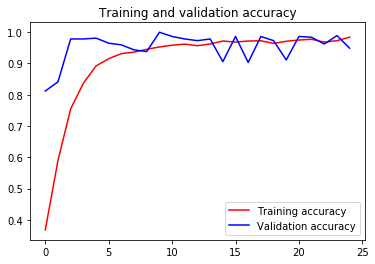

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

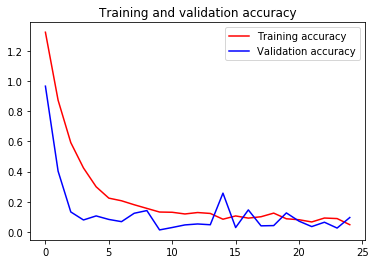

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()